## Exercici 2

Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

**Observaciones**: 
El data frame contiene información separada por :: y por ||  

Datos que contiene:  

· Índice  
· Nombre de Película  
· Año de la película  
· Género de película (en este caso existen varios generlos para una misma película)

In [1]:
#cargamos las librerías que vamos a utilizar
import pandas as pd
import numpy as np

In [3]:
# Ruta del archivo
ruta_archivo = 'C:\\Users\\vsanc\\OneDrive\\Escritorio\\CIBERNARIUM\\DataScience\\Sprint4\\movies.dat'

# Para cargar el archivo .dat y dividir en columnas

with open(ruta_archivo, 'r', encoding='latin1') as file:
    lines = file.readlines()
#Abre el archivo en modo lectura ('r') y utiliza el encoding 'latin1' para leer caracteres especiales. 
#Usar with asegura que el archivo se cierre automáticamente al finalizar el bloque de código.

Debemos tener en cuenta:  

*"El resultat final ha de ser un dataframe amb les variables de nom de la pel·lícula, any i genere. També és important quedar-se amb un sol gènere per a cada pel·lícula!"*  

A continuación vamos a separar por columnas los datos. Decido que lo más adecuado es crear las siguientes columnas:  

1. Nombre Película.
2. Años Película.
3. Género* 

(*)Para las películas que tengan más de un género se duplicará o triplicará la película, con el fin, que cuando hagamos un fíltro por género nos aparezca en la muestra.


In [38]:
# Creamos listas para las columnas
nom_pelicula = []
any_pelicula = []
generes = []

# Procesar cada línea del archivo
for line in lines: #el bucle dice, en la linea de cada linea:
    parts = line.strip().split('::') #Elimina espacios en blanco y divide la línea en partes usando '::' como separador, 
    #creando una lista llamada parts.
    
    # Separar la información de la película
    nombre_anio = parts[1].split('(') #Divide la parte del nombre y el año usando '(' como separador.
    nom = nombre_anio[0].strip() #Extrae el nombre de la película y elimina espacios en blanco adicionales.
    
    # Buscamos el año dentro del último paréntesis antes de '::' ejemplo [ 1150::Return of Martin Guerre, The (Retour de Martin Guerre, Le) (1982)::Drama]
    anio = np.nan  # Establecemos el valor predeterminado como NaN
    if len(nombre_anio) > 1:
        anio_info = nombre_anio[-1].split(')')[0].strip()  # Extraemos el contenido dentro del último paréntesis
        if anio_info.isdigit() and len(anio_info) == 4:  # Comprobamos si es un año válido (formato YYYY)
            anio = anio_info
    
    generes_raw = parts[2].split('|') #Divide los géneros en una lista separada por el carácter '|'.
    
    # Creamos una fila por cada género de la película
    for gen in generes_raw: #crea una nueva fila por cada género de la película, 
        nom_pelicula.append(nom) #agregando el nombre de la película, 
        any_pelicula.append(anio) #el año y 
        generes.append(gen) #el género a las listas 

# Crearamos el nuevo DataFrame
new_df = pd.DataFrame({
    'Nom Película': nom_pelicula,
    'Any Película': any_pelicula,
    'Génere': generes
})

# Reordenamos las columnas, para que se pueda visualizar correctamente y añadiendo un .reindex 
new_df = new_df.reindex(columns=['Nom Película', 'Any Película', 'Génere'])

# Mostramos las 10 primeras filas para comprobar 
print(new_df.head(10).to_string(index=False))


     Nom Película Any Película     Génere
        Toy Story         1995  Animation
        Toy Story         1995 Children's
        Toy Story         1995     Comedy
          Jumanji         1995  Adventure
          Jumanji         1995 Children's
          Jumanji         1995    Fantasy
 Grumpier Old Men         1995     Comedy
 Grumpier Old Men         1995    Romance
Waiting to Exhale         1995     Comedy
Waiting to Exhale         1995      Drama


In [39]:
#confirmamos que se haya ejecutado correctamente
new_df['Any Película'].unique()

array(['1995', '1994', '1996', '1976', '1993', '1992', '1988', '1967',
       '1964', '1977', '1965', '1982', '1962', '1990', '1991', '1989',
       '1937', '1940', '1969', '1981', '1973', '1970', '1960', '1955',
       '1956', '1959', '1968', '1980', '1975', '1986', '1948', '1943',
       '1963', '1950', '1946', '1987', '1997', '1974', '1958', '1949',
       '1972', '1998', '1933', '1952', '1951', '1957', '1961', '1954',
       '1934', '1944', '1942', '1941', '1953', '1939', '1947', '1945',
       '1938', '1935', '1936', '1926', '1932', '1930', '1971', '1979',
       '1966', '1978', '1985', '1983', '1984', '1931', '1922', '1927',
       '1929', '1928', '1925', '1923', '1999', '1919', '2000', '1920',
       '1921'], dtype=object)

## Exercici 3

Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?

Fes una o dues representacions gràfiques i justifica la teva elecció.

1. Quiero saber el número de películas de cada año según su género.

He escogido un gráfico boxplot porque voy a utilizar 3 variables. Está gráfica nos muestra dónde se concentra el mayor volumen de películas según su género, y podemos ver que en algunos casos, nos encontramos "anomalias", como por ejemplo los más destacados pueden ser comedia, drama, romance y Thriller, que aunque el grosor esté en los años 80, 90 los años 20 y 70 encontramos dichas anomalías a través de los puntos.

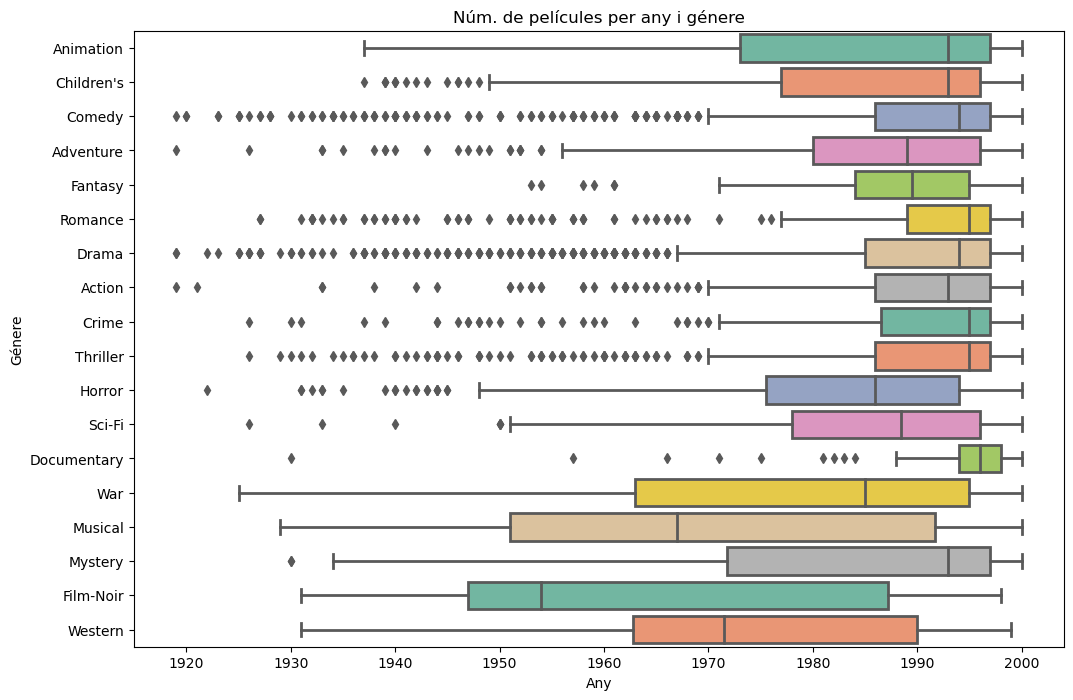

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Eliminamos filas que tengan años NaN (si se desea)
new_df_clean = new_df.dropna(subset=['Any Película'])

# Convertimos la columna 'Any Película' a tipo numérico
new_df_clean['Any Película'] = pd.to_numeric(new_df_clean['Any Película'])

# Creamos un boxplot con seaborn ajustando los parámetros
plt.figure(figsize=(12, 8))
sns.boxplot(x='Any Película', y='Génere', data=new_df_clean, linewidth=2, palette='Set2')
plt.title('Núm. de películes per any i génere')
plt.xlabel('Any')
plt.ylabel('Génere')
plt.show()

· Las cajas en el gráfico (llamadas cajas de caja y bigotes) muestran la distribución de los datos para cada año y género.  
· La caja inferior y superior representan el primer y tercer cuartil de los datos, respectivamente. La línea en medio de la caja es la mediana.  
· Los "bigotes" se extienden hasta 1.5 veces el rango intercuartílico desde los extremos de la caja.  
· Los puntos más allá de los bigotes se consideran valores atípicos y se representan como puntos individuales en el gráfico.